Investigate a Dataset

The No-show appointment database has information on patient’s background and brief medical condition. Based on the data set provide, we will analysis some statistical analysis to find the reason why patients miss their appointments. we will answer questions like What is the proportion of No show-up for some selected category, list of hospitals with the biggest and lowest Scholarship index, and Identify the category where the No-Show is highest. In the next few steps I will try to analyze and show the reasoning for my conclusion.

In [77]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly relevant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(11)

PatientId  AppointmentID Gender          ScheduledDay  \
0   2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1   5.589980e+14        5642503      M  2016-04-29T16:08:27Z   
2   4.262960e+12        5642549      F  2016-04-29T16:19:04Z   
3   8.679510e+11        5642828      F  2016-04-29T17:29:31Z   
4   8.841190e+12        5642494      F  2016-04-29T16:07:23Z   
5   9.598510e+13        5626772      F  2016-04-27T08:36:51Z   
6   7.336880e+14        5630279      F  2016-04-27T15:05:12Z   
7   3.449830e+12        5630575      F  2016-04-27T15:39:58Z   
8   5.639470e+13        5638447      F  2016-04-29T08:02:16Z   
9   7.812460e+13        5629123      F  2016-04-27T12:48:25Z   
10  7.345360e+14        5630213      F  2016-04-27T14:58:11Z   

          AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0   2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1   2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2   2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3   2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4   2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   
5   2016-04-29T00:00:00Z   76          REPÚBLICA            0             1   
6   2016-04-29T00:00:00Z   23         GOIABEIRAS            0             0   
7   2016-04-29T00:00:00Z   39         GOIABEIRAS            0             0   
8   2016-04-29T00:00:00Z   21         ANDORINHAS            0             0   
9   2016-04-29T00:00:00Z   19          CONQUISTA            0             0   
10  2016-04-29T00:00:00Z   30     NOVA PALESTINA            0             0   

    Diabetes  Alcoholism  Handcap  SMS_received No-show  
0          0           0        0             0      No  
1          0           0        0             0      No  
2          0           0        0             0      No  
3          0           0        0             0      No  
4          1           0        0             0      No  
5          0           0        0             0      No  
6          0           0        0             0     Yes  
7          0           0        0             0     Yes  
8          0           0        0             0      No  
9          0           0        0             0      No  
10         0           0        0             0      No

In [20]:
df.shape

(110527, 14)

In [11]:
# In the next few steps we are going to investigate and verify each column for any data errors. This will help us to identify and fix the errors down the line
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [21]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.920000e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172615e+12   5.640286e+06      18.000000       0.000000   
50%    3.173180e+13   5.680573e+06      37.000000       0.000000   
75%    9.439170e+13   5.725524e+06      55.000000       0.000000   
max    9.999820e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [22]:
# check if there is any missing value in the cells
df.isnull() .sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [35]:
# check for duplicate value
df.duplicated().sum()

0

In [23]:
# To verify if the same patients has the tendency to have no show. First check the pateintID column for any repeated entry for the same patient
df. PatientId.value_counts() .head(20)

8.221460e+14    88
9.963767e+10    84
2.688610e+13    70
3.353480e+13    65
7.579750e+13    62
8.713750e+14    62
2.584240e+11    62
6.264200e+12    62
6.684490e+13    57
8.722790e+11    55
8.923970e+13    54
8.435224e+09    51
8.534400e+14    50
6.543360e+13    46
1.448000e+13    46
9.452750e+12    42
8.189450e+13    42
1.882320e+14    40
2.271580e+12    38
9.496200e+12    38
Name: PatientId, dtype: int64

In [24]:
df[df.PatientId <= 0]['PatientId']

Series([], Name: PatientId, dtype: float64)

In [37]:
# The Gender Column is the other area to check 
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [38]:
# check the values in the Age column
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [7]:
df['AppointmentDay'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

In [30]:
df['Neighbourhood'].nunique()

81

In [79]:
df['Scholarship'].unique()

array([0, 1])

In [34]:
df['Handcap']. unique()

array([0, 1, 2, 3, 4])

In [37]:
df['SMS_received'] .unique()

array([0, 1])

In [80]:
df['No-show'] .unique()

array(['No', 'Yes'], dtype=object)

In [40]:
# organize the data by identifying and renaming the columns appropriately
df.columns = ['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show']


In [22]:
sum(df.PatientId.duplicated())

48783

In [41]:
# convert specific column to integer

df['PatientID'] = (df['PatientID']).astype('int64')

In [62]:
# Change the format for 'AppointmentDay' and 'ScheduledDay' column from string to Date and Time format.
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDay']).dt.date

In [81]:
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDay']).dt.date

In [54]:
# Earlier I saw a negative value in Age column. This value does not help me with my anaysis so I am going to drop it.

df = df[df.Age != -1]

In [82]:
# I can update the value of some column to make them more descriptive than '0' or '1'.

df['Scholarship'] = df.Scholarship.astype('category')
df.Scholarship.cat.rename_categories (['No Scholarship','Scholarship'], inplace = True)

In [83]:
df['Hipertension'] = df.Hipertension.astype('category')
df.Hipertension.cat.rename_categories(['No Hypertension','Hypertension'], inplace = True)

In [84]:
df['Diabetes'] = df.Diabetes.astype('category')
df.Diabetes.cat.rename_categories(['No Diabetes','Diabetes'], inplace = True);

In [85]:
df['Alcoholism'] = df.Alcoholism.astype('category')
df.Alcoholism.cat.rename_categories(['No Alcoholism','Alcoholism'], inplace = True);

In [86]:
df['Handcap'] = df.Handcap.astype('category')
df.Handcap.cat.rename_categories(['No Handicap','Handicap L1','Handicap L2', 'Handicap L3', 'Handicap L4'], inplace = True);

In [87]:
NoShow_df = df[df['No-show'] == 'NoShow']

In [88]:
df['SMS_received'] = df.SMS_received.astype('category')
df.SMS_received.cat.rename_categories(['No SMS_received','SMS_received'], inplace = True);

In [89]:
# check to all the changes I made to the columns.
df.shape

(110527, 15)

## Exploratory Data Analysis
Research Question 1. - What is the proportion of No show-up for some selected catagory? Here I am going to use pie chart to show proportions with in some category? 

In [59]:
#define proportion by Variable and then work with some selected catagory
def PropByVar(df, variable):
    df_pie = df[variable].value_counts()
    ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
    ax.set_title(variable + ' (in %) (Per appointment)\n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)


F    65.0
M    35.0
Name: Gender, dtype: float64

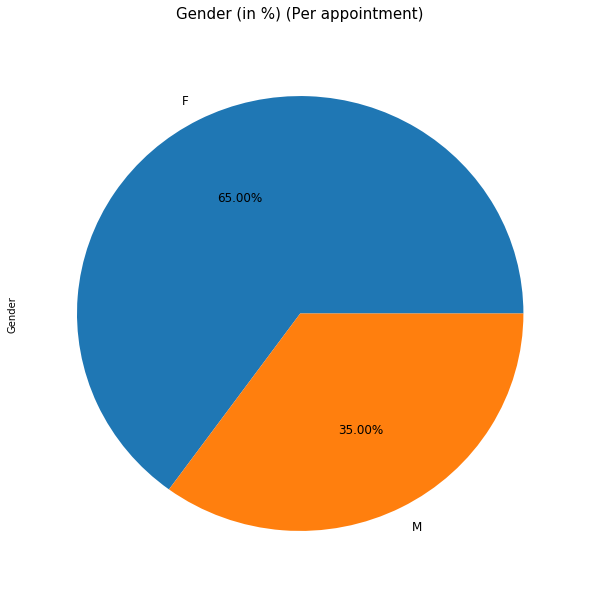

In [60]:
PropByVar(df, 'Gender')

In [30]:
AgeGroupLabels = [ "{0} - {1}".format(i, i + 19) for i in range(0, 120, 20)]
df['AgeGroup'] = pd.cut(df.Age, range(0, 121, 20), right=False, labels=AgeGroupLabels)
df['AgeGroup'] = df.AgeGroup.astype('category')
df.AgeGroup.cat.categories


Index(['0 - 19', '20 - 39', '40 - 59', '60 - 79', '80 - 99', '100 - 119'], dtype='object')

0 - 19       27.51
40 - 59      27.21
20 - 39      26.12
60 - 79      16.11
80 - 99       3.03
100 - 119     0.01
Name: AgeGroup, dtype: float64

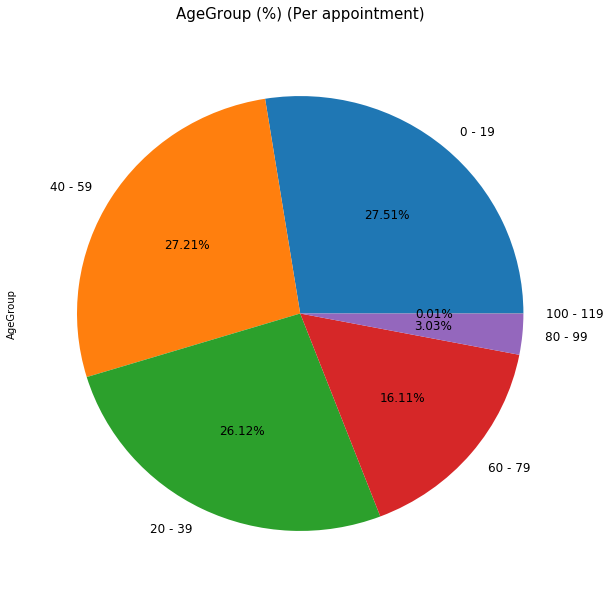

In [31]:
PropByVar(df, 'AgeGroup')

In [93]:
top_5_Nbrhd_list = list(df['Neighbourhood'].value_counts().nlargest(5).index)

In [94]:
df_top_5_Nbrhd = df[df['Neighbourhood'].isin (top_5_Nbrhd_list)]

JARDIM CAMBURI     30.45
MARIA ORTIZ        22.90
RESISTÊNCIA        17.48
JARDIM DA PENHA    15.30
ITARARÉ            13.87
Name: Neighbourhood, dtype: float64

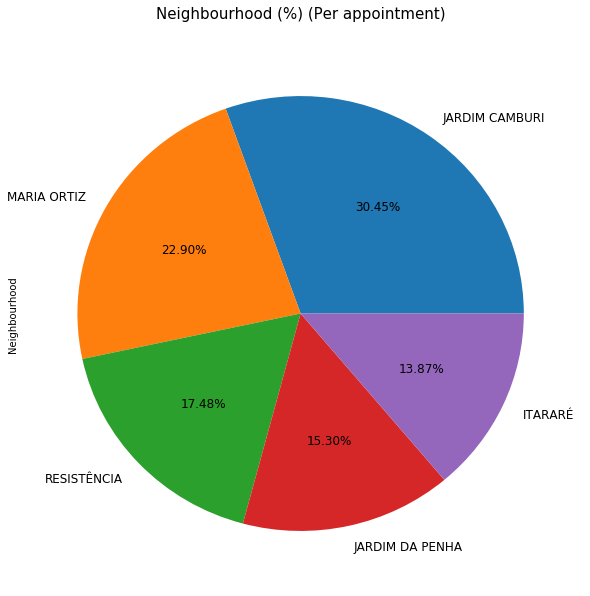

In [95]:
PropByVar(df_top_5_Nbrhd, 'Neighbourhood')

## Exploratory Data Analysis
Research Question 2. List of hospitals with the biggest and lowest Scholarship index. 

In [96]:
df['Scholarship'] = df.Scholarship.astype('category')
df.Scholarship.cat.rename_categories(['No Scholarship','Scholarship'], inplace = True)

In [97]:
def PropByVar(df, variable):
    df_pie = df[variable].value_counts()
    ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
    ax.set_title(variable + ' (in %) (Per appointment)\n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)


No Scholarship    90.17
Scholarship        9.83
Name: Scholarship, dtype: float64

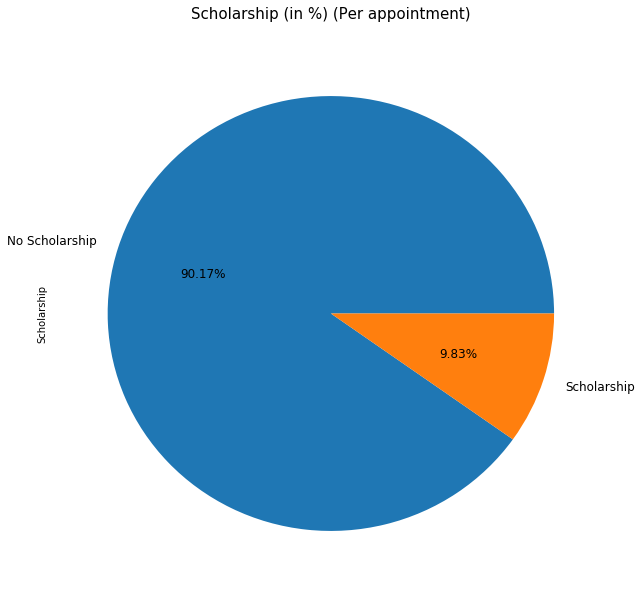

In [9]:
PropByVar(df, 'Scholarship')

In [98]:
def prob_show(df, group_by):    
    df = pd.crosstab(index = dataset[group_by], columns = dataset['Noshow']).reset_index()
    # calc probability of showing up 0 means show up , 1 means missed
    df['probShowUp'] = df[0] / (df[1] + df[0])
    return df[[group_by, 'probShowUp']]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


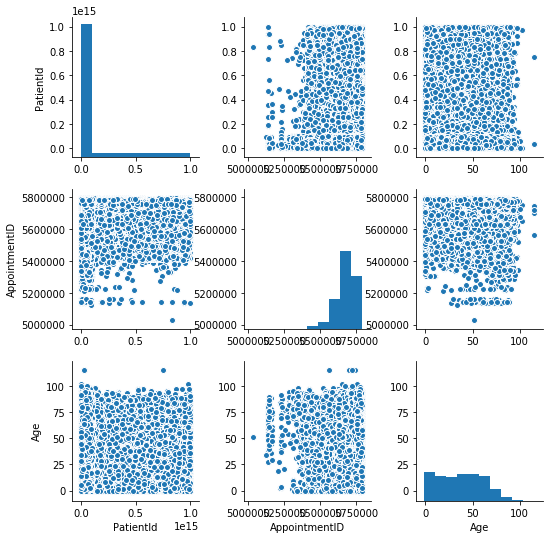

In [102]:
sns.pairplot(df);

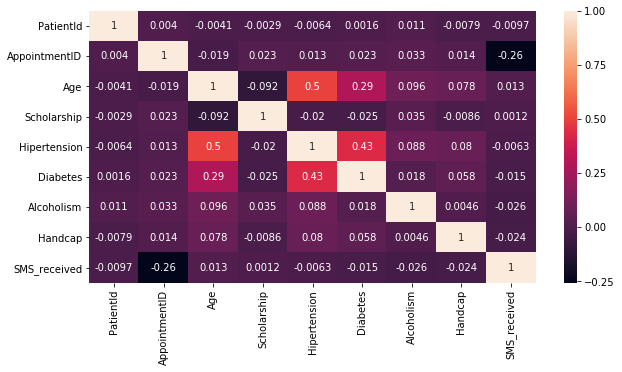

In [38]:
# create a heatmap to see if there is any relationship we can easily identify.

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(), ax=ax, annot=True);

## Exploratory Data Analysis
Research Question 3. Identify the relationhip between the Age ca

In [167]:
# Importing data from newly cleaned dataset
df_newdb = pd.read_csv('Updated - noshowappointments-kagglev2-may-2016.csv')
df_newdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [168]:
df_new = df_newdb.groupby('Age').mean()

In [170]:
# check the values in the Age column
df_new = df_newdb.groupby('Age')

Text(0.5,1,'Age in Relation to Number of Patients')

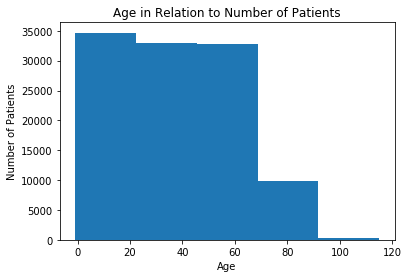

In [175]:
plt.figure();
age_hist = df['Age'].plot.hist(bins=5)
age_hist.set_xlabel("Age")
age_hist.set_ylabel("Number of Patients")
age_hist.set_title('Age in Relation to Number of Patients')

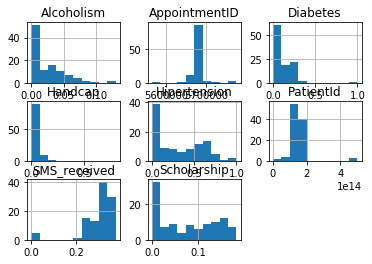

In [19]:
df_new.hist();

<a id='conclusions'></a>
## Conclusions
After reviewing and analyzing the data provided the followings are my finding. Please note these result is solely depends on the information provided. I believe if more information like employment or family information provided we can definitely come-up with different outcome and answer why certain age group, Neighborhood, or gender has no show.

-	largest (in %) neighborhood is Jardim Camuri 
-	The female patients are greater than male patients.
-	Age group 0 – 19 is the largest group.

Limitations

There are a number of limitations with the No show data set. First, the time was set to 00:00:00 so I was not able to address the appointment times. Second there are some coloumns that are not relevant to analysis and answer the important questions that can arise from the data provided. Lastly, there were some instances where data was not provided and no explanation provided why. Despite it's limitations, I tried to make statistical predictions based on the data set provided. 


References
- Hetland, M.L (2017). Beginning Python. Norway: APress
- Chan, J.(2014). Learn Python in One Day.
- Youtube channels - APMonitor.com, OSPY.com
- Websites - https://stackoverflow.com/questions, Github.com,
datasciencedemonstrated.com, 



In [3]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0